In [27]:
import os
import numpy as np
import pandas as pd

In [28]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import StratifiedKFold

In [29]:
from tensorflow import keras

In [30]:
directory = 'modified_data_psd'

eeg_data = []
labels = []
for filename in os.scandir(directory):
    data = pd.read_csv(filename.path)
    if (data["label"][0] == 'Like'):
        labels.append(0)
    else:
        labels.append(1)
    eeg_data.append(data.drop(['label'] , axis = 1))
    

In [31]:
labels = np.array(labels)
len(labels)

1045

In [32]:
eeg_data = np.array(eeg_data)

In [33]:
# print(like_samples.shape , dislike_samples.shape)
eeg_data.shape

(1045, 257, 14)

In [34]:
test_data = eeg_data[:83]
test_label = labels[:83]

eeg_data = eeg_data[83:]
labels = labels[83:]

In [35]:
kfold = StratifiedKFold(n_splits=5, shuffle=False)
k_fold = list(kfold.split(eeg_data , labels))


In [36]:
# Set input shape for CNN

input_shape = (257,14,1)

# Define CNN model architecture
model = Sequential()

model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu' , input_shape = input_shape))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.3))

model.add(Flatten())


model.add(Dense(164, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(2, activation='softmax'))


In [37]:

model.compile(keras.optimizers.Adam(learning_rate = 0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
folds = []

In [39]:
validation_scores = []
for train_indices, val_indices in k_fold:
    
    X_train, X_val = eeg_data[train_indices], eeg_data[val_indices]
    y_train, y_val = labels[train_indices], labels[val_indices]
    
#     train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])
#     test_0, test_1 = len(y_val[y_val==0]), len(y_val[y_val==1])
#     print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))
    
    # Train the model on the training data for this fold
    folds.append(model.fit(X_train, y_train, epochs = 200 , batch_size = 16))

    # Evaluate the model on the validation data for this fold
    score = model.evaluate(X_val, y_val)
    validation_scores.append(score)
#     print('Validation score:', score)


Epoch 1/200
49/49 [==============================] - 5s 58ms/step - loss: 0.9011 - accuracy: 0.6047
Epoch 2/200
49/49 [==============================] - 3s 57ms/step - loss: 0.6869 - accuracy: 0.6658
Epoch 3/200
49/49 [==============================] - 3s 56ms/step - loss: 0.5733 - accuracy: 0.7308
Epoch 4/200
49/49 [==============================] - 2s 51ms/step - loss: 0.5168 - accuracy: 0.7685
Epoch 5/200
49/49 [==============================] - 3s 55ms/step - loss: 0.4925 - accuracy: 0.7724
Epoch 6/200
49/49 [==============================] - 3s 52ms/step - loss: 0.4778 - accuracy: 0.7737
Epoch 7/200
49/49 [==============================] - 3s 57ms/step - loss: 0.4265 - accuracy: 0.7815
Epoch 8/200
49/49 [==============================] - 3s 57ms/step - loss: 0.4278 - accuracy: 0.8010
Epoch 9/200
49/49 [==============================] - 3s 55ms/step - loss: 0.3913 - accuracy: 0.8296
Epoch 10/200
49/49 [==============================] - 3s 55ms/step - loss: 0.3987 - accuracy: 0.8244

49/49 [==============================] - 3s 57ms/step - loss: 0.0889 - accuracy: 0.9623
Epoch 83/200
49/49 [==============================] - 3s 58ms/step - loss: 0.0747 - accuracy: 0.9740
Epoch 84/200
49/49 [==============================] - 3s 58ms/step - loss: 0.1170 - accuracy: 0.9480
Epoch 85/200
49/49 [==============================] - 3s 57ms/step - loss: 0.0772 - accuracy: 0.9753
Epoch 86/200
49/49 [==============================] - 3s 57ms/step - loss: 0.0656 - accuracy: 0.9805
Epoch 87/200
49/49 [==============================] - 3s 57ms/step - loss: 0.0872 - accuracy: 0.9662
Epoch 88/200
49/49 [==============================] - 3s 57ms/step - loss: 0.1198 - accuracy: 0.9506
Epoch 89/200
49/49 [==============================] - 3s 57ms/step - loss: 0.0842 - accuracy: 0.9714
Epoch 90/200
49/49 [==============================] - 3s 57ms/step - loss: 0.0688 - accuracy: 0.9779
Epoch 91/200
49/49 [==============================] - 3s 57ms/step - loss: 0.0834 - accuracy: 0.9701
Epo

49/49 [==============================] - 3s 53ms/step - loss: 0.0375 - accuracy: 0.9844
Epoch 163/200
49/49 [==============================] - 3s 53ms/step - loss: 0.0462 - accuracy: 0.9844
Epoch 164/200
49/49 [==============================] - 3s 53ms/step - loss: 0.0485 - accuracy: 0.9831
Epoch 165/200
49/49 [==============================] - 3s 53ms/step - loss: 0.0632 - accuracy: 0.9857
Epoch 166/200
49/49 [==============================] - 3s 53ms/step - loss: 0.0701 - accuracy: 0.9740
Epoch 167/200
49/49 [==============================] - 3s 53ms/step - loss: 0.0493 - accuracy: 0.9831
Epoch 168/200
49/49 [==============================] - 3s 53ms/step - loss: 0.0335 - accuracy: 0.9922
Epoch 169/200
49/49 [==============================] - 3s 53ms/step - loss: 0.0438 - accuracy: 0.9831
Epoch 170/200
49/49 [==============================] - 3s 53ms/step - loss: 0.0357 - accuracy: 0.9909
Epoch 171/200
49/49 [==============================] - 3s 53ms/step - loss: 0.0376 - accuracy: 0

49/49 [==============================] - 3s 53ms/step - loss: 0.0200 - accuracy: 0.9974
Epoch 43/200
49/49 [==============================] - 3s 53ms/step - loss: 0.0343 - accuracy: 0.9896
Epoch 44/200
49/49 [==============================] - 3s 55ms/step - loss: 0.0902 - accuracy: 0.9623
Epoch 45/200
49/49 [==============================] - 3s 56ms/step - loss: 0.0366 - accuracy: 0.9896
Epoch 46/200
49/49 [==============================] - 3s 58ms/step - loss: 0.0346 - accuracy: 0.9909
Epoch 47/200
49/49 [==============================] - 3s 54ms/step - loss: 0.0360 - accuracy: 0.9857
Epoch 48/200
49/49 [==============================] - 3s 53ms/step - loss: 0.0578 - accuracy: 0.9766
Epoch 49/200
49/49 [==============================] - 3s 53ms/step - loss: 0.0481 - accuracy: 0.9792
Epoch 50/200
49/49 [==============================] - 3s 53ms/step - loss: 0.0428 - accuracy: 0.9844
Epoch 51/200
49/49 [==============================] - 3s 54ms/step - loss: 0.0275 - accuracy: 0.9909
Epo

49/49 [==============================] - 3s 53ms/step - loss: 0.0202 - accuracy: 0.9948
Epoch 124/200
49/49 [==============================] - 3s 53ms/step - loss: 0.0300 - accuracy: 0.9896
Epoch 125/200
49/49 [==============================] - 3s 53ms/step - loss: 0.0168 - accuracy: 0.9935
Epoch 126/200
49/49 [==============================] - 3s 53ms/step - loss: 0.0117 - accuracy: 0.9948
Epoch 127/200
49/49 [==============================] - 3s 54ms/step - loss: 0.0155 - accuracy: 0.9922
Epoch 128/200
49/49 [==============================] - 3s 53ms/step - loss: 0.0185 - accuracy: 0.9935
Epoch 129/200
49/49 [==============================] - 3s 53ms/step - loss: 0.0142 - accuracy: 0.9961
Epoch 130/200
49/49 [==============================] - 3s 53ms/step - loss: 0.0094 - accuracy: 0.9987
Epoch 131/200
49/49 [==============================] - 3s 54ms/step - loss: 0.0148 - accuracy: 0.9987
Epoch 132/200
49/49 [==============================] - 3s 53ms/step - loss: 0.0241 - accuracy: 0

49/49 [==============================] - 3s 53ms/step - loss: 0.0481 - accuracy: 0.9818
Epoch 3/200
49/49 [==============================] - 3s 53ms/step - loss: 0.0605 - accuracy: 0.9805
Epoch 4/200
49/49 [==============================] - 3s 53ms/step - loss: 0.0408 - accuracy: 0.9857
Epoch 5/200
49/49 [==============================] - 3s 53ms/step - loss: 0.0325 - accuracy: 0.9883
Epoch 6/200
49/49 [==============================] - 3s 54ms/step - loss: 0.0311 - accuracy: 0.9883
Epoch 7/200
49/49 [==============================] - 3s 54ms/step - loss: 0.0177 - accuracy: 0.9935
Epoch 8/200
49/49 [==============================] - 3s 54ms/step - loss: 0.0391 - accuracy: 0.9844
Epoch 9/200
49/49 [==============================] - 3s 54ms/step - loss: 0.0330 - accuracy: 0.9857
Epoch 10/200
49/49 [==============================] - 3s 53ms/step - loss: 0.0169 - accuracy: 0.9935
Epoch 11/200
49/49 [==============================] - 3s 53ms/step - loss: 0.0190 - accuracy: 0.9974
Epoch 12/2

49/49 [==============================] - 3s 56ms/step - loss: 0.0104 - accuracy: 0.9974
Epoch 84/200
49/49 [==============================] - 3s 53ms/step - loss: 0.0142 - accuracy: 0.9948
Epoch 85/200
49/49 [==============================] - 3s 54ms/step - loss: 0.0061 - accuracy: 0.9987
Epoch 86/200
49/49 [==============================] - 3s 54ms/step - loss: 0.0061 - accuracy: 0.9987
Epoch 87/200
49/49 [==============================] - 3s 53ms/step - loss: 0.0148 - accuracy: 0.9961
Epoch 88/200
49/49 [==============================] - 3s 54ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 89/200
49/49 [==============================] - 3s 54ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 90/200
49/49 [==============================] - 3s 54ms/step - loss: 0.0087 - accuracy: 0.9987
Epoch 91/200
49/49 [==============================] - 3s 54ms/step - loss: 0.0135 - accuracy: 0.9935
Epoch 92/200
49/49 [==============================] - 3s 54ms/step - loss: 0.0061 - accuracy: 0.9987
Epo

49/49 [==============================] - 3s 63ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 164/200
49/49 [==============================] - 3s 58ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 165/200
49/49 [==============================] - 3s 61ms/step - loss: 0.0085 - accuracy: 0.9974
Epoch 166/200
49/49 [==============================] - 3s 63ms/step - loss: 0.0047 - accuracy: 0.9987
Epoch 167/200
49/49 [==============================] - 3s 67ms/step - loss: 0.0123 - accuracy: 0.9961
Epoch 168/200
49/49 [==============================] - 3s 63ms/step - loss: 0.0089 - accuracy: 0.9948
Epoch 169/200
49/49 [==============================] - 3s 66ms/step - loss: 0.0090 - accuracy: 0.9987
Epoch 170/200
49/49 [==============================] - 3s 65ms/step - loss: 0.0126 - accuracy: 0.9948
Epoch 171/200
49/49 [==============================] - 3s 63ms/step - loss: 0.0283 - accuracy: 0.9948
Epoch 172/200
49/49 [==============================] - 3s 63ms/step - loss: 0.0090 - accuracy: 0

49/49 [==============================] - 3s 54ms/step - loss: 0.0107 - accuracy: 0.9974
Epoch 44/200
49/49 [==============================] - 3s 53ms/step - loss: 0.0073 - accuracy: 0.9987
Epoch 45/200
49/49 [==============================] - 3s 54ms/step - loss: 0.0048 - accuracy: 0.9987
Epoch 46/200
49/49 [==============================] - 3s 53ms/step - loss: 0.0080 - accuracy: 0.9974
Epoch 47/200
49/49 [==============================] - 3s 54ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 48/200
49/49 [==============================] - 3s 53ms/step - loss: 0.0033 - accuracy: 0.9987
Epoch 49/200
49/49 [==============================] - 3s 63ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 50/200
49/49 [==============================] - 3s 63ms/step - loss: 0.0061 - accuracy: 0.9987
Epoch 51/200
49/49 [==============================] - 3s 55ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 52/200
49/49 [==============================] - 3s 55ms/step - loss: 0.0069 - accuracy: 0.9961
Epo

49/49 [==============================] - 3s 54ms/step - loss: 9.9721e-04 - accuracy: 1.0000
Epoch 124/200
49/49 [==============================] - 3s 53ms/step - loss: 0.0027 - accuracy: 0.9987
Epoch 125/200
49/49 [==============================] - 3s 53ms/step - loss: 0.0032 - accuracy: 0.9987
Epoch 126/200
49/49 [==============================] - 3s 55ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 127/200
49/49 [==============================] - 3s 53ms/step - loss: 5.5103e-04 - accuracy: 1.0000
Epoch 128/200
49/49 [==============================] - 3s 53ms/step - loss: 7.2534e-04 - accuracy: 1.0000
Epoch 129/200
49/49 [==============================] - 3s 54ms/step - loss: 8.1727e-04 - accuracy: 1.0000
Epoch 130/200
49/49 [==============================] - 3s 54ms/step - loss: 6.3610e-04 - accuracy: 1.0000
Epoch 131/200
49/49 [==============================] - 3s 53ms/step - loss: 0.0018 - accuracy: 0.9987
Epoch 132/200
49/49 [==============================] - 3s 54ms/step - loss: 

49/49 [==============================] - 3s 58ms/step - loss: 0.0104 - accuracy: 0.9961
Epoch 2/200
49/49 [==============================] - 3s 59ms/step - loss: 0.0097 - accuracy: 0.9987
Epoch 3/200
49/49 [==============================] - 3s 60ms/step - loss: 0.0061 - accuracy: 0.9987
Epoch 4/200
49/49 [==============================] - 5s 102ms/step - loss: 0.0052 - accuracy: 0.9987
Epoch 5/200
49/49 [==============================] - 3s 64ms/step - loss: 0.0058 - accuracy: 0.9961
Epoch 6/200
49/49 [==============================] - 3s 61ms/step - loss: 0.0082 - accuracy: 0.9974
Epoch 7/200
49/49 [==============================] - 1011s 21s/step - loss: 0.0054 - accuracy: 0.9974
Epoch 8/200
49/49 [==============================] - 5s 108ms/step - loss: 0.0040 - accuracy: 0.9987
Epoch 9/200
49/49 [==============================] - 5s 95ms/step - loss: 0.0052 - accuracy: 0.9974
Epoch 10/200
49/49 [==============================] - 3s 68ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 1

49/49 [==============================] - 3s 67ms/step - loss: 0.0079 - accuracy: 0.9987
Epoch 83/200
49/49 [==============================] - 3s 62ms/step - loss: 0.0101 - accuracy: 0.9987
Epoch 84/200
49/49 [==============================] - 3s 55ms/step - loss: 0.0034 - accuracy: 0.9987
Epoch 85/200
49/49 [==============================] - 3s 53ms/step - loss: 6.1535e-04 - accuracy: 1.0000
Epoch 86/200
49/49 [==============================] - 3s 54ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 87/200
49/49 [==============================] - 3s 53ms/step - loss: 0.0034 - accuracy: 0.9974
Epoch 88/200
49/49 [==============================] - 3s 53ms/step - loss: 8.1158e-04 - accuracy: 1.0000
Epoch 89/200
49/49 [==============================] - 3s 53ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 90/200
49/49 [==============================] - 3s 52ms/step - loss: 8.8781e-04 - accuracy: 1.0000
Epoch 91/200
49/49 [==============================] - 3s 53ms/step - loss: 0.0062 - accuracy

49/49 [==============================] - 3s 53ms/step - loss: 0.0047 - accuracy: 0.9974
Epoch 162/200
49/49 [==============================] - 3s 55ms/step - loss: 7.7570e-04 - accuracy: 1.0000
Epoch 163/200
49/49 [==============================] - 3s 53ms/step - loss: 0.0043 - accuracy: 0.9974
Epoch 164/200
49/49 [==============================] - 3s 54ms/step - loss: 8.5493e-04 - accuracy: 1.0000
Epoch 165/200
49/49 [==============================] - 3s 53ms/step - loss: 0.0048 - accuracy: 0.9987
Epoch 166/200
49/49 [==============================] - 3s 53ms/step - loss: 0.0063 - accuracy: 0.9987
Epoch 167/200
49/49 [==============================] - 3s 53ms/step - loss: 0.0060 - accuracy: 0.9974
Epoch 168/200
49/49 [==============================] - 3s 53ms/step - loss: 0.0024 - accuracy: 0.9987
Epoch 169/200
49/49 [==============================] - 3s 53ms/step - loss: 0.0023 - accuracy: 0.9987
Epoch 170/200
49/49 [==============================] - 3s 54ms/step - loss: 0.0139 - acc

In [40]:
acc =  [a[1]*100 for a in validation_scores]
avg_score = sum(acc) / len(validation_scores)
print('Average validation score:', avg_score)

Average validation score: 93.26316833496094


In [41]:
acc

[83.41968655586243, 83.93782377243042, 98.95833134651184, 100.0, 100.0]

In [42]:
testing_score = []

for modl in folds:
    score = modl.model.evaluate(test_data , test_label)
    testing_score.append(score[1] * 100)

3/3 [==============================] - 0s 24ms/step - loss: 0.2403 - accuracy: 0.9398


In [43]:
training_acc = []
for i in folds:
    training_acc.append(i.history['accuracy'][-1] * 100)

In [44]:
import matplotlib.pyplot as plt

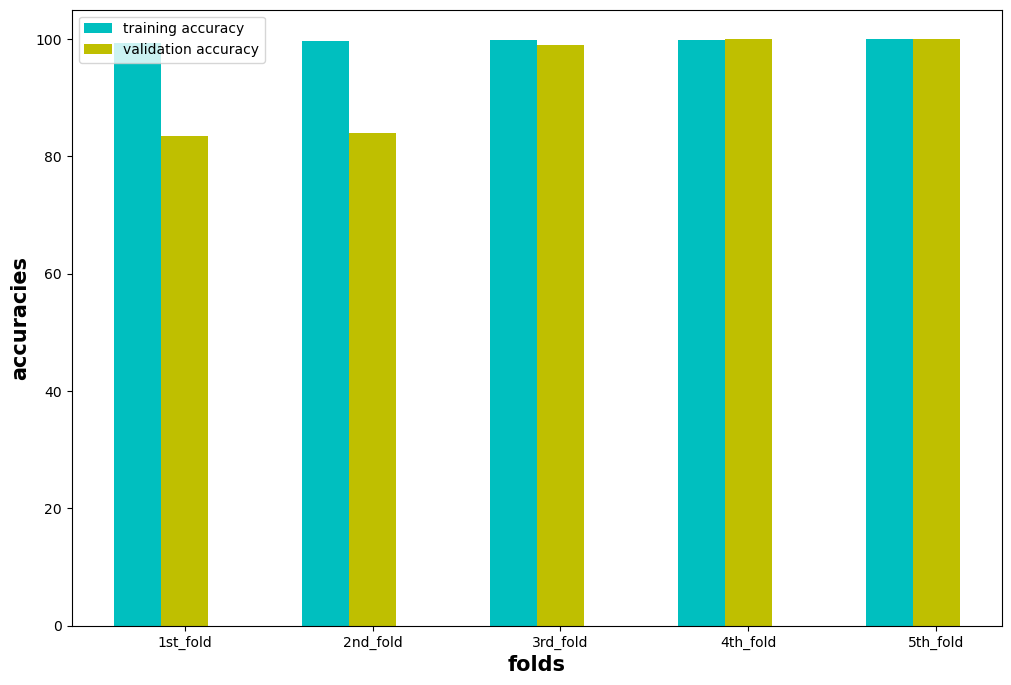

In [45]:
x = ['1st_fold' , '2nd_fold' , '3rd_fold' , '4th_fold' , '5th_fold']
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
br1 = np.arange(len(x))
br2 = [x + barWidth for x in br1]
plt.bar(br1  , training_acc , color = "c" , label = "training accuracy" ,width = barWidth )
plt.bar(br2 , acc , color = "y" , label = "validation accuracy" , width = barWidth )
plt.xlabel('folds', fontweight ='bold', fontsize = 15)
plt.ylabel('accuracies', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(x))],x)
 
plt.legend()
plt.show()

In [46]:
# c = 1
# co = 0
# for i in folds:
#     plt.figure(figsize = (12,8))
#     plt.subplot(5,1,c)
#     plt.plot(i.history['accuracy'], label='val_accuracy')
    
# #     plt.plot(i.history['val_accuracy'], label = 'val_accuracy')
#     plt.xlabel('Epoch')
#     plt.ylabel('Accuracy')
#     plt.ylim([0.5, 1])
#     plt.legend(loc='lower right')
#     c+=1
#     co+=1

In [47]:
y_pred=[]

for data in test_data:
    y_pred.append(np.argmax(model.predict(np.array([data , ]))))

1/1 [==============================] - 0s 23ms/step


# Evaluate model

In [48]:
import seaborn as sns
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt

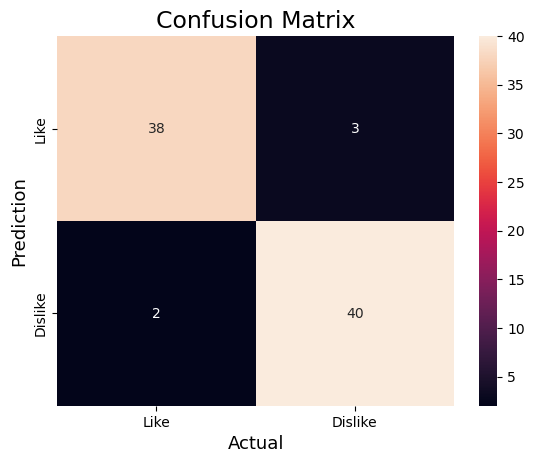

In [49]:
cm = confusion_matrix(test_label,y_pred)
 
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Like','Dislike'],
            yticklabels=['Like','Dislike'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [50]:
accuaracy = (cm[0][0] + cm[1][1]) / test_data.shape[0] *100
recall = (cm[0][0]) /(cm[0][0] + cm[1][0]) *100
precision = (cm[0][0]) /(cm[0][0] + cm[0][1]) *100
f1_score = (2*recall*precision)/(recall + precision)

In [51]:
print('Accuracy: ' , accuaracy)
print('Precision: ' , precision)
print('Recall: ' , recall)
print('F1 SCore: ' , f1_score)

Accuracy:  93.97590361445783
Precision:  92.6829268292683
Recall:  95.0
F1 SCore:  93.82716049382717


# save model

In [52]:
# model.save('models/modified_5fold_1Model')